In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df=pd.read_csv('raw_data.csv')

In [3]:
df.isnull().count()

survival_status         187
Recipientgender         187
Stemcellsource          187
Donorage                187
Donorage35              187
IIIV                    187
Gendermatch             187
DonorABO                187
RecipientABO            187
RecipientRh             187
ABOmatch                187
CMVstatus               187
DonorCMV                187
RecipientCMV            187
Riskgroup               187
Txpostrelapse           187
Diseasegroup            187
HLAmatch                187
HLAmismatch             187
Antigen                 187
Alel                    187
HLAgrI                  187
Recipientage            187
Recipientage10          187
Recipientageint         187
Relapse                 187
aGvHDIIIIV              187
extcGvHD                187
CD34kgx10d6             187
CD3dCD34                187
CD3dkgx10d8             187
Rbodymass               187
ANCrecovery             187
PLTrecovery             187
time_to_aGvHD_III_IV    187
survival_time       

In [4]:
X=df.iloc[:,1:]
Y=df.iloc[:,0]

In [5]:
Y.unique()

array([0, 1], dtype=int64)

# Split 80% for training and 20% for testing.                             

In [6]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=83)

# LogisticRegression

In [7]:
clf=LogisticRegression(max_iter=500)

In [8]:
x1=cross_val_score(clf,x_train,y_train,cv=5)
print('5 Fold Cross Validation')
for i,j in enumerate(x1):
    print(f'Fold{i} = {j}')

5 Fold Cross Validation
Fold0 = 0.9
Fold1 = 0.9666666666666667
Fold2 = 0.8333333333333334
Fold3 = 0.9666666666666667
Fold4 = 0.896551724137931


In [9]:
fit_1=clf.fit(x_train,y_train)

In [10]:
pred=fit_1.predict(x_test)

In [11]:
#Evaluation Metrics
acc=accuracy_score(y_test,pred)
rec=recall_score(y_test,pred)
pre=precision_score(y_test,pred)
f1=f1_score(y_test,pred)
cf=confusion_matrix(y_test,pred)

In [12]:
print('Confusion Matrix')
print(cf)
print(f'Accuracy = {acc}')
print(f'Recall = {rec}')
print(f'Precesion = {pre}')
print(f'f1 score = {f1}')

Confusion Matrix
[[23  2]
 [ 3 10]]
Accuracy = 0.868421052631579
Recall = 0.7692307692307693
Precesion = 0.8333333333333334
f1 score = 0.8


# SVM

In [ ]:
sv1=SVC(kernel='linear')
sv2=cross_val_score(sv1,x_train,y_train,cv=5)
print('5 Fold Cross Validation')
for i,j in enumerate(sv2):
    print(f'Fold{i} = {j}')

In [ ]:
fit_2=sv1.fit(x_train,y_train)

In [ ]:
pred_2=fit_2.predict(x_test)

In [ ]:
#Evaluation Metrics
acc=accuracy_score(y_test,pred_2)
rec=recall_score(y_test,pred_2)
pre=precision_score(y_test,pred_2)
f1=f1_score(y_test,pred_2)
cf=confusion_matrix(y_test,pred_2)

In [ ]:
print('Confusion Matrix')
print(cf)
print(f'Accuracy = {acc}')
print(f'Recall = {rec}')
print(f'Precesion = {pre}')
print(f'f1 score = {f1}')

# KNN

In [13]:
knn=KNeighborsClassifier()
knn_2=cross_val_score(knn,x_train,y_train,cv=5)
print('5 Fold Cross Validation')
for i,j in enumerate(knn_2):
    print(f'Fold{i} = {j}')

5 Fold Cross Validation
Fold0 = 0.9
Fold1 = 0.9666666666666667
Fold2 = 0.8333333333333334
Fold3 = 0.8333333333333334
Fold4 = 0.9310344827586207


In [14]:
fit_3=knn.fit(x_train,y_train)

In [15]:
pred_3=fit_3.predict(x_test)

In [16]:
#Evaluation Metrics
acc=accuracy_score(y_test,pred_3)
rec=recall_score(y_test,pred_3)
pre=precision_score(y_test,pred_3)
f1=f1_score(y_test,pred_3)
cf=confusion_matrix(y_test,pred_3)

In [17]:
print('Confusion Matrix')
print(cf)
print(f'Accuracy = {acc}')
print(f'Recall = {rec}')
print(f'Precesion = {pre}')
print(f'f1 score = {f1}')

Confusion Matrix
[[25  0]
 [ 2 11]]
Accuracy = 0.9473684210526315
Recall = 0.8461538461538461
Precesion = 1.0
f1 score = 0.9166666666666666


# OVBLR

In [18]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import scipy.optimize
df=pd.read_csv('raw_data.csv')
X=df.iloc[:,1:]
Y=df.iloc[:,0]
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)
# Add a bias term to the features
X_train_bias = np.hstack((X_train, np.ones((X_train.shape[0], 1))))
X_test_bias = np.hstack((X_test, np.ones((X_test.shape[0], 1))))
# Logistic sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Variational Bayesian Logistic Regression
def variational_bayesian_logistic_regression(X, y, num_iter=1000):
    num_samples, num_features = X.shape
    weights = np.zeros(num_features)  # Initialize weights to zeros
    precision_matrix = np.eye(num_features)  # Initialize precision matrix to identity

    for _ in range(num_iter):
        # Compute posterior parameters
        covariance_matrix = np.linalg.inv(precision_matrix)
        posterior_mean = weights
        posterior_covariance = covariance_matrix

        # Compute gradient of the evidence lower bound (ELBO)
        y_pred = sigmoid(X.dot(weights))
        gradient = X.T.dot(y - y_pred) - covariance_matrix.dot(weights)

        # Update precision matrix using the gradient
        precision_matrix += 0.01 * np.eye(num_features)  # Add a small regularization term
        weights += 0.01 * covariance_matrix.dot(gradient)

    return posterior_mean, covariance_matrix

# Train the model
posterior_mean, posterior_covariance = variational_bayesian_logistic_regression(X_train_bias, y_train)

# Make predictions on the test set
logits = X_test_bias.dot(posterior_mean)
probabilities = sigmoid(logits)
predictions = (probabilities > 0.5).astype(int)



In [19]:
#Evaluation Metrics
acc=accuracy_score(y_test,predictions)
rec=recall_score(y_test,predictions)
pre=precision_score(y_test,predictions)
f1=f1_score(y_test,predictions)
cf=confusion_matrix(y_test,predictions)

In [20]:
print('Confusion Matrix')
print(cf)
print(f'Accuracy = {acc}')
print(f'Recall = {rec}')
print(f'Precesion = {pre}')
print(f'f1 score = {f1}')

Confusion Matrix
[[24  1]
 [ 0 13]]
Accuracy = 0.9736842105263158
Recall = 1.0
Precesion = 0.9285714285714286
f1 score = 0.962962962962963


# ROC Curve

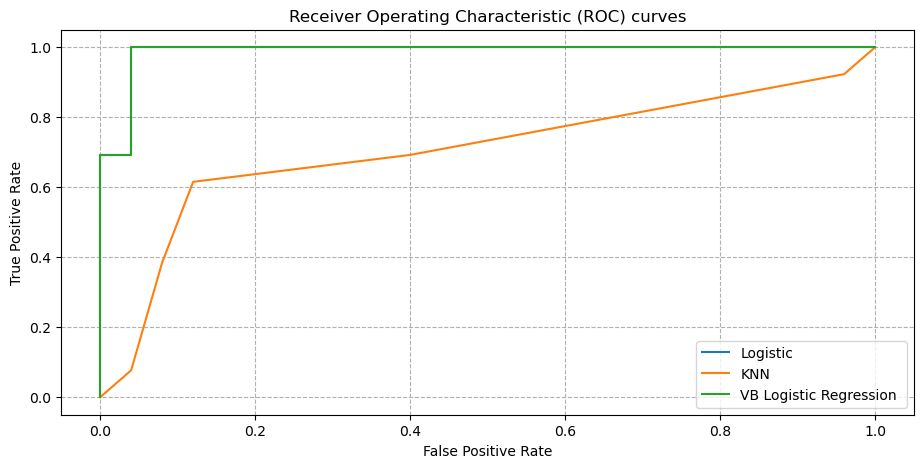

In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.metrics import RocCurveDisplay

fig, ax_roc = plt.subplots(1, 1, figsize=(11, 5))

classifiers = {
    #"SVM": SVC(kernel='linear', probability=True),  # Enable probability estimates for SVM
    "Logistic": LogisticRegression(max_iter=500),
    "KNN": KNeighborsClassifier(),
    "VB Logistic Regression": variational_bayesian_logistic_regression
}

for name, clf in classifiers.items():
    if name == "VB Logistic Regression":
        logits = X_test_bias.dot(posterior_mean)
        probabilities = sigmoid(logits)
        fpr, tpr, _ = roc_curve(y_test, probabilities)
        roc_auc = auc(fpr, tpr)
        RocCurveDisplay(fpr=fpr, tpr=tpr, estimator_name=f'{name} ').plot(ax=ax_roc)
    else:
        clf.fit(X_train, y_train)
        try:
            # Try using predict_proba
            prob_pos = clf.predict_proba(X_test)[:, 1]
        except AttributeError:
            # Use decision_function if predict_proba is not available
            prob_pos = clf.decision_function(X_test)
     
        fpr, tpr, _ = roc_curve(y_test, prob_pos)
        roc_auc = roc_auc_score(y_test, prob_pos)
        RocCurveDisplay(fpr=fpr, tpr=tpr, estimator_name=f'{name}').plot(ax=ax_roc)

ax_roc.set_title("Receiver Operating Characteristic (ROC) curves")
ax_roc.grid(linestyle="--")
plt.legend()
plt.show()